**USING PIVOT TABLES FOR EXTRACTING NECESSARY DATA**



**SYNTAX:** df.pivot_table(values=   ,index=   ,column=   ,aggfunc=   )
* **values**: the values you want to use data for calculation
* **index**: the object you want to compare (row)
* **columns**: the object you want to compare (column)
* **aggfunc**: method (min, max, median...)

**EXAMPLE:** To compare the mean of tips of each gender in different regions, we will use this code:
* df.pivot_table(values='tips',index='gender',columns='country',aggfunc='mean')

In [2]:
#Loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset

#Loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df

#Clean data
df.job_posted_date = pd.to_datetime(df.job_posted_date)

In [3]:
df_new = df.pivot_table(values='salary_hour_avg',index='job_country',columns='job_title_short',aggfunc='mean').fillna(11.500)
df_new['Business Analyst']
df.job_title_short

0         Senior Data Engineer
1                 Data Analyst
2                Data Engineer
3                Data Engineer
4                Data Engineer
                  ...         
785736       Software Engineer
785737            Data Analyst
785738        Business Analyst
785739           Data Engineer
785740       Software Engineer
Name: job_title_short, Length: 785741, dtype: object

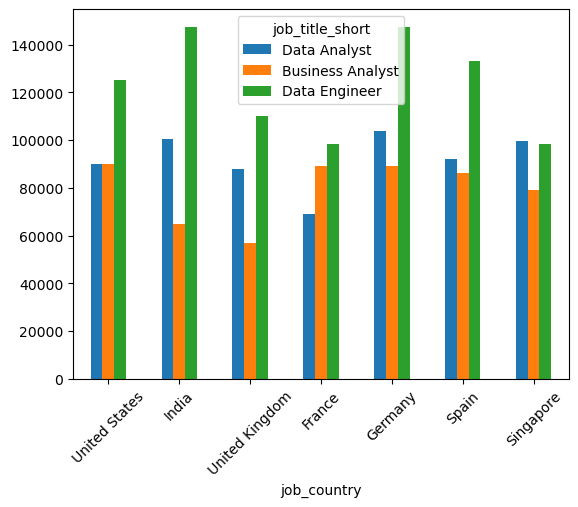

In [4]:
#Draw a bar graph that show top 10 countries with highest number of jobs for Data Analyst, Business Analyst and Data Engineer
top_country = df.job_country.value_counts().head(7).index
job=['Data Analyst','Business Analyst','Data Engineer']
df.salary_year_avg
job_country = df.pivot_table(
    values = 'salary_year_avg',
    index = 'job_country',
    columns = 'job_title_short',
    aggfunc = 'median'
)

ok_job = job_country.loc[top_country]
job_by_country = ok_job[job]
job_by_country.plot(kind='bar')
plt.xticks(rotation=45)
plt.show()

**EXERCISES**


In [6]:
import pandas as pd

data = {
    'Employee': ['Alice', 'Bob', 'Charlie', 'David', 'Eve', 'Frank'],
    'Department': ['HR', 'IT', 'IT', 'Finance', 'HR', 'Finance'],
    'Salary': [60000, 80000, 90000, 75000, 65000, 70000]
}

hr = pd.DataFrame(data)
hr

,Employee,Department,Salary
0,Alice,HR,60000
1,Bob,IT,80000
2,Charlie,IT,90000
3,David,Finance,75000
4,Eve,HR,65000
5,Frank,Finance,70000


In [8]:
# Given the following DataFrame, create a pivot table that shows the average Salary for each Department
hr.pivot_table(
    values= 'Salary',
    columns = 'Department',
    aggfunc='mean'
)


Department,Finance,HR,IT
Salary,72500.0,62500.0,85000.0


In [10]:
# Modify the pivot table from Exercise 1 to display both the average salary and maximum salary per department.
hr.pivot_table(
    values= 'Salary',
    index = 'Department',
    aggfunc=['mean','max']
)



,mean,max
,Salary,Salary
Department,,
Finance,72500.0,75000
HR,62500.0,65000
IT,85000.0,90000


In [16]:
# Expand the dataset by adding a Gender column and create a pivot table that shows the average salary grouped by Department and Gender.

data = {
    'Employee': ['Alice', 'Bob', 'Charlie', 'David', 'Eve', 'Frank'],
    'Department': ['HR', 'IT', 'IT', 'Finance', 'HR', 'Finance'],
    'Gender': ['Female', 'Male', 'Male', 'Male', 'Female', 'Male'],
    'Salary': [60000, 80000, 90000, 75000, 65000, 70000]
}

hrr = pd.DataFrame(data)
hrr_altered=hrr.pivot_table(
    values='Salary',
    index = 'Gender',
    columns = 'Department',
    aggfunc='mean'
)
hrr_altered.fillna(0)


Department,Finance,HR,IT
Gender,,,
Female,0.0,62500.0,0.0
Male,72500.0,0.0,85000.0


In [14]:
hrr

,Employee,Department,Gender,Salary
0,Alice,HR,Female,60000
1,Bob,IT,Male,80000
2,Charlie,IT,Male,90000
3,David,Finance,Male,75000
4,Eve,HR,Female,65000
5,Frank,Finance,Male,70000
